## Music Genre Classification using Neural Network on GTZAN

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import csv
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

1. Observe the data:

Read and load one sample audio file for each of the ten different genres:

In [7]:
sample_classical = r"GTZAN\genres_original\classical\classical.00083.wav"
sample_blues = r"GTZAN\genres_original\blues\blues.00031.wav"
sample_reggae = r"GTZAN\genres_original\reggae\reggae.00002.wav"
sample_rock = r"GTZAN\genres_original\rock\rock.00023.wav"
sample_jazz = r"GTZAN\genres_original\jazz\jazz.00031.wav"
sample_country = r"GTZAN\genres_original\country\country.00031.wav"
sample_disco = r"GTZAN\genres_original\disco\disco.00045.wav"
sample_hiphop = r"GTZAN\genres_original\hiphop\hiphop.00031.wav"
sample_metal = r"GTZAN\genres_original\metal\metal.00009.wav"
sample_pop = r"GTZAN\genres_original\pop\pop.00031.wav"

In [8]:
classical, sr = librosa.load(sample_classical, mono=True, duration=30)
blues, _ = librosa.load(sample_blues, mono=True, duration=30)
reggae, _ = librosa.load(sample_reggae, mono=True, duration=30)
rock, _ = librosa.load(sample_rock, mono=True, duration=30)
jazz, _ = librosa.load(sample_jazz, mono=True, duration=30)
country,_ = librosa.load(sample_country, mono=True, duration=30)
disco, _ = librosa.load(sample_disco, mono=True, duration=30)
hiphop, _ = librosa.load(sample_hiphop, mono=True, duration=30)
metal, _ = librosa.load(sample_metal, mono=True, duration=30)
pop, _ = librosa.load(sample_pop, mono=True, duration=30)

Observe and visualize the waveplots (with ZCR values) for each of the music pieces:

In [9]:
print(
    "Average Zero Crossing Rate\n\n" + 
    "Classical: {:.1f} % \nBlues: {:.1f} % \nReggae: {:.1f} % \nRock: {:.1f} % \nJazz: {:.1f} % \
    \nCountry: {:.1f} % \nDisco: {:.1f} % \nHip-hop: {:.1f} % \nMetal: {:.1f} % \nPop: {:.1f} %"
     .format(
        librosa.feature.zero_crossing_rate(classical).mean() * 100,
        librosa.feature.zero_crossing_rate(blues).mean() * 100,
        librosa.feature.zero_crossing_rate(reggae).mean() * 100,
        librosa.feature.zero_crossing_rate(rock).mean() * 100,
        librosa.feature.zero_crossing_rate(jazz).mean() * 100,
        librosa.feature.zero_crossing_rate(country).mean() * 100,
        librosa.feature.zero_crossing_rate(disco).mean() * 100,
        librosa.feature.zero_crossing_rate(hiphop).mean() * 100,
        librosa.feature.zero_crossing_rate(metal).mean() * 100,
        librosa.feature.zero_crossing_rate(pop).mean() * 100
    )
)

Average Zero Crossing Rate

Classical: 5.1 % 
Blues: 4.3 % 
Reggae: 7.5 % 
Rock: 11.6 % 
Jazz: 7.2 %     
Country: 9.5 % 
Disco: 11.0 % 
Hip-hop: 13.6 % 
Metal: 9.5 % 
Pop: 15.3 %


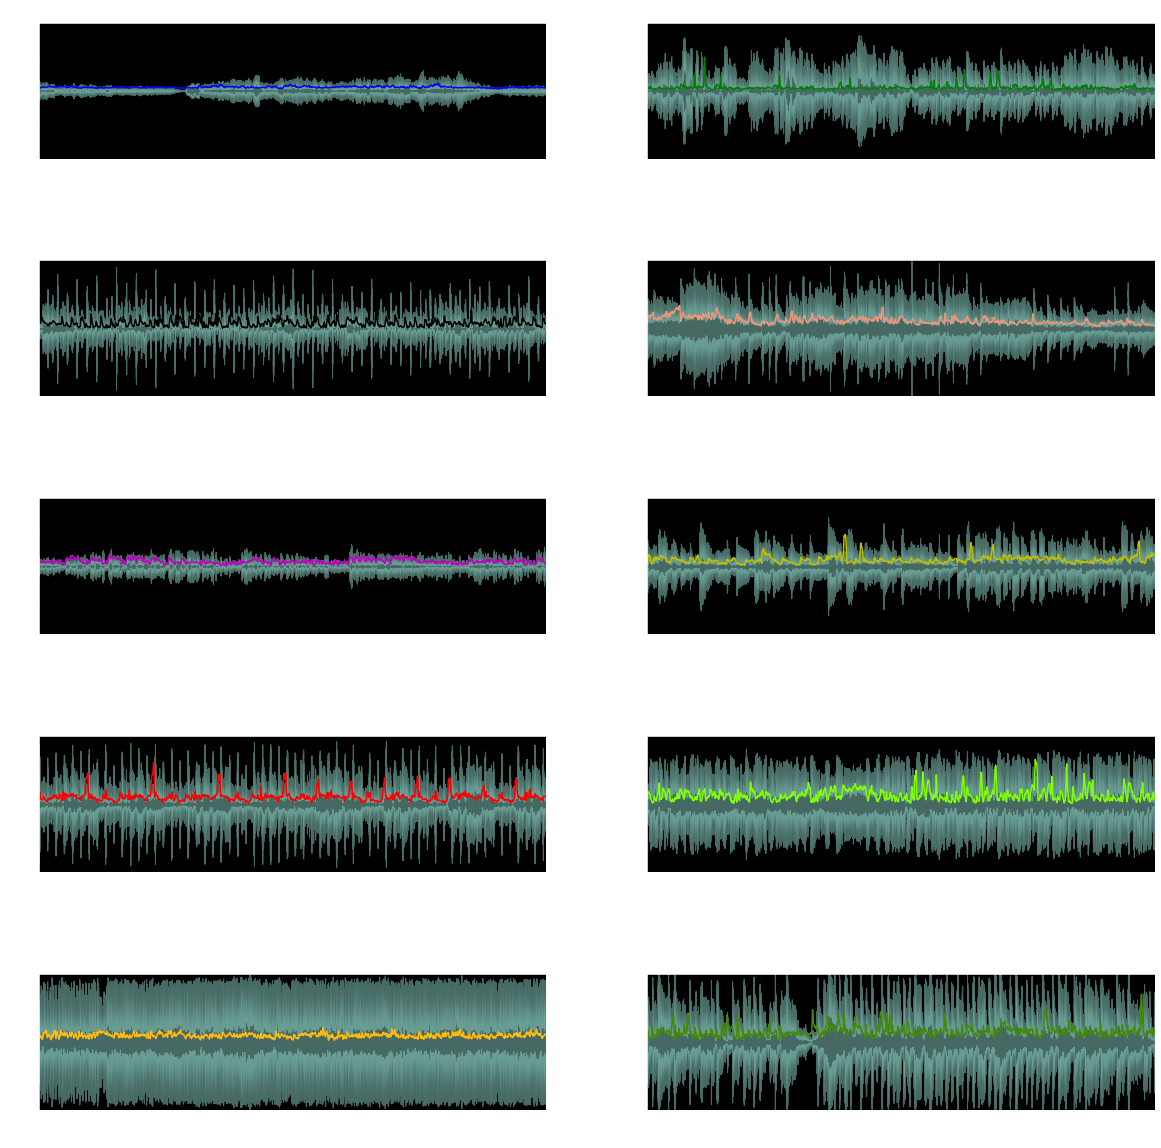

In [10]:
# Constant: Number of samples per frame
FRAME_SIZE = 1024

# Extract the Zero Crossing Rate (ZCR) for each piece
zcr_classical = librosa.feature.zero_crossing_rate(classical, frame_length=FRAME_SIZE)[0]
zcr_blues = librosa.feature.zero_crossing_rate(blues, frame_length=FRAME_SIZE)[0]
zcr_reggae = librosa.feature.zero_crossing_rate(reggae, frame_length=FRAME_SIZE)[0]
zcr_rock = librosa.feature.zero_crossing_rate(rock, frame_length=FRAME_SIZE)[0]
zcr_jazz = librosa.feature.zero_crossing_rate(jazz, frame_length=FRAME_SIZE)[0]
zcr_country = librosa.feature.zero_crossing_rate(country, frame_length=FRAME_SIZE)[0]
zcr_disco = librosa.feature.zero_crossing_rate(disco, frame_length=FRAME_SIZE)[0]
zcr_hiphop = librosa.feature.zero_crossing_rate(hiphop, frame_length=FRAME_SIZE)[0]
zcr_metal = librosa.feature.zero_crossing_rate(metal, frame_length=FRAME_SIZE)[0]
zcr_pop = librosa.feature.zero_crossing_rate(pop, frame_length=FRAME_SIZE)[0]

# Convert frame counts to time
frames = range(len(zcr_classical))
t = librosa.frames_to_time(frames)

# Visualize normalized ZCR of different music genre songs
plt.figure(figsize=(20, 20))

ax = plt.subplot(5, 2, 1)
librosa.display.waveplot(classical, alpha=0.5)
plt.plot(t, zcr_classical, color="b")
plt.ylim((-1, 1))
plt.title("Classical")

plt.subplot(5, 2, 2)
librosa.display.waveplot(blues, alpha=0.5)
plt.plot(t, zcr_blues, color="g")
plt.ylim((-1, 1))
plt.title("Blues")

plt.subplot(5, 2, 3)
librosa.display.waveplot(reggae, alpha=0.5)
plt.plot(t, zcr_reggae, color="k")
plt.ylim((-1, 1))
plt.title("Reggae")

plt.subplot(5, 2, 4)
librosa.display.waveplot(rock, alpha=0.5)
plt.plot(t, zcr_rock, color="#E9967A")
plt.ylim((-1, 1))
plt.title("Rock")

plt.subplot(5, 2, 5)
librosa.display.waveplot(jazz, alpha=0.5)
plt.plot(t, zcr_jazz, color="m")
plt.ylim((-1, 1))
plt.title("Jazz")

plt.subplot(5, 2, 6)
librosa.display.waveplot(country, alpha=0.5)
plt.plot(t, zcr_country, color="y")
plt.ylim((-1, 1))
plt.title("Country")

plt.subplot(5, 2, 7)
librosa.display.waveplot(disco, alpha=0.5)
plt.plot(t, zcr_disco, color="r")
plt.ylim((-1, 1))
plt.title("Disco")

plt.subplot(5, 2, 8)
librosa.display.waveplot(hiphop, alpha=0.5)
plt.plot(t, zcr_hiphop, color="#7FFF00")
plt.ylim((-1, 1))
plt.title("Hip-hop")

plt.subplot(5, 2, 9)
librosa.display.waveplot(metal, alpha=0.5)
plt.plot(t, zcr_metal, color="#FFB90F")
plt.ylim((-1, 1))
plt.title("Metal")

plt.subplot(5, 2, 10)
librosa.display.waveplot(pop, alpha=0.5)
plt.plot(t, zcr_pop, color="#458B00")
plt.ylim((-1, 1))
plt.title("Pop")
plt.subplots_adjust(hspace = 0.75)

Check the spectrogram of the classical piece:

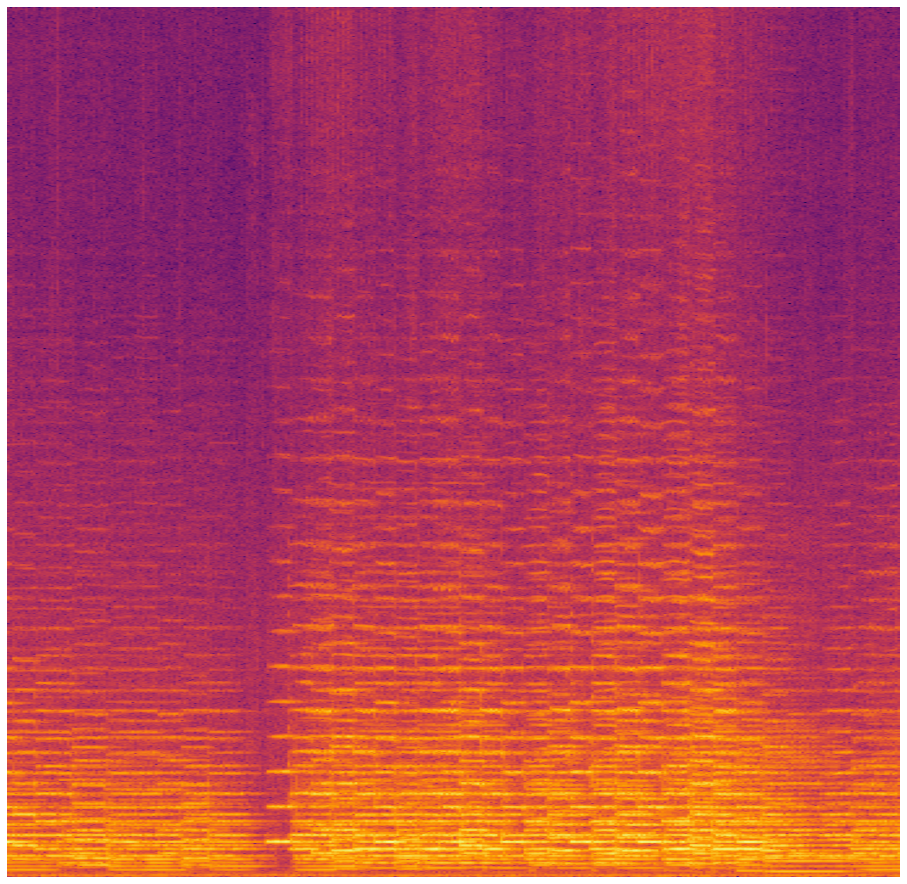

<Figure size 432x288 with 0 Axes>

In [11]:
cmap = plt.get_cmap("inferno")
plt.figure(figsize=(16,16))
plt.specgram(classical, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides="default", mode="default", scale="dB");
plt.axis("off");
plt.show()
plt.clf()

2. Extract features:
- Mel-frequency Ceptral Coefficients
- Spectral Centroid
- Zero Crossing Rate
- Chroma Frequencies, and 
- Spectral roll-off

In [52]:
header = "filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate"
for i in range(1, 21):
    header += f" mfcc{i}"
header += " label"
header = header.split()

file = open("dataset.csv", "w", newline="")
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = "blues classical country disco hiphop jazz metal pop reggae rock".split()
for genre in genres:
    for filename in os.listdir(f"GTZAN\\genres_original\\{genre}"):
        songname = f"GTZAN\\genres_original\\{genre}\\{filename}"
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f"{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}"    
        for e in mfcc:
            to_append += f" {np.mean(e)}"
        to_append += f" {genre}"
        file = open("dataset.csv", "a", newline="")
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [72]:
data = pd.read_csv("dataset.csv")
data.head()

# Encode labels
data = data.drop(["filename"],axis=1) 
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

# Scale feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Build and fit a neural network model for genre classification:

In [80]:
model = Sequential()
model.add(layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [81]:
classifier = model.fit(X_train,
                    y_train,
                    validation_split=0.33,
                    epochs=100,
                    batch_size=512,
                    verbose=True)

Epoch 1/100
2/2 [==============================] - 1s 154ms/step - loss: 2.3359 - accuracy: 0.0879 - val_loss: 2.2261 - val_accuracy: 0.1667
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 2.1936 - accuracy: 0.2374 - val_loss: 2.1371 - val_accuracy: 0.3068
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 2.0967 - accuracy: 0.3645 - val_loss: 2.0595 - val_accuracy: 0.3712
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 2.0103 - accuracy: 0.4075 - val_loss: 1.9936 - val_accuracy: 0.3788
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 1.9324 - accuracy: 0.4131 - val_loss: 1.9337 - val_accuracy: 0.3939
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 1.8601 - accuracy: 0.4299 - val_loss: 1.8748 - val_accuracy: 0.4015
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 1.7897 - accuracy: 0.4393 - val_loss: 1.8181 - val_accuracy: 0.4205
Epoch 8/100
2/2 [==

After 100 epochs, plot the training and validation accuracies:

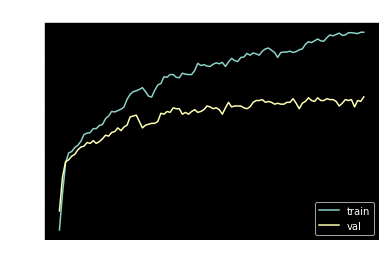

In [91]:
plt.plot(classifier.history["accuracy"])
plt.plot(classifier.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc="lower right")
plt.show()

Evaluate the model on the test set:

In [96]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.0883 - accuracy: 0.6400


[1.088325023651123, 0.6399999856948853]

We got an accuracy of 0.64 on unseen data.

This is not bad, as musical genre classification is sometimes difficult, even for the human ear.